In [1]:
import pandas as pd

pd.set_option("mode.copy_on_write", True)

bitcoinboom_makebitcoin_bitmex_longbitcoin = pd.read_csv(
    "bitcoinboom_makebitcoin_bitmex_longbitcoin.csv",
    skiprows=1,
)
bitcoincrash_bitcoinloophole_sellbitcoin_bitcoinscam = pd.read_csv(
    "bitcoincrash_bitcoinloophole_sellbitcoin_bitcoinscam.csv",
    skiprows=1,
)
bitcoinprice_buybitcoin_bitcoin_coinbase = pd.read_csv(
    "bitcoinprice_buybitcoin_bitcoin_coinbase.csv", skiprows=1
)
shortbitcoin_bitcoinbubble_bitcoinillegal_bitcoinbear = pd.read_csv(
    "shortbitcoin_bitcoinbubble_bitcoinillegal_bitcoinbear.csv",
    skiprows=1,
)

In [2]:
bitcoinboom_makebitcoin_bitmex_longbitcoin.columns = [
    "date",
    "bitcoinboom",
    "makebitcoin",
    "bitmex",
    "longbitcoin",
]
bitcoincrash_bitcoinloophole_sellbitcoin_bitcoinscam.columns = [
    "date",
    "bitcoincrash",
    "bitcoinloophole",
    "sellbitcoin",
    "bitcoinscam",
]
bitcoinprice_buybitcoin_bitcoin_coinbase.columns = [
    "date",
    "bitcoinprice",
    "buybitcoin",
    "bitcoin",
    "coinbase",
]
shortbitcoin_bitcoinbubble_bitcoinillegal_bitcoinbear.columns = [
    "date",
    "shortbitcoin",
    "bitcoinbubble",
    "bitcoinillegal",
    "bitcoinbear",
]

In [3]:
# merge all dataframes
df = (
    bitcoinboom_makebitcoin_bitmex_longbitcoin.merge(
        bitcoincrash_bitcoinloophole_sellbitcoin_bitcoinscam, on="date"
    )
    .merge(bitcoinprice_buybitcoin_bitcoin_coinbase, on="date")
    .merge(shortbitcoin_bitcoinbubble_bitcoinillegal_bitcoinbear, on="date")
)
df.head(10)

,date,bitcoinboom,makebitcoin,bitmex,longbitcoin,bitcoincrash,bitcoinloophole,sellbitcoin,bitcoinscam,bitcoinprice,buybitcoin,bitcoin,coinbase,shortbitcoin,bitcoinbubble,bitcoinillegal,bitcoinbear
0,2021-04-11,5,80,37,85,22,5,35,14,13,1,54,24,51,45,19,18
1,2021-04-18,3,81,40,100,64,6,40,16,17,1,70,10,62,32,22,32
2,2021-04-25,3,71,35,65,18,6,29,11,13,1,51,6,41,20,16,20
3,2021-05-02,3,80,36,80,21,5,34,14,11,1,43,10,39,25,19,18
4,2021-05-09,3,86,41,92,35,6,44,14,16,1,59,11,48,24,21,26
5,2021-05-16,3,89,45,98,100,4,52,14,29,1,100,9,100,30,25,55
6,2021-05-23,7,75,37,77,37,5,28,12,21,1,68,6,68,22,23,40
7,2021-05-30,3,57,31,53,13,4,21,11,15,1,50,6,44,13,15,23
8,2021-06-06,3,60,42,58,18,6,22,14,14,1,55,4,59,11,13,31
9,2021-06-13,1,48,31,51,9,5,16,11,11,1,39,4,44,13,14,20


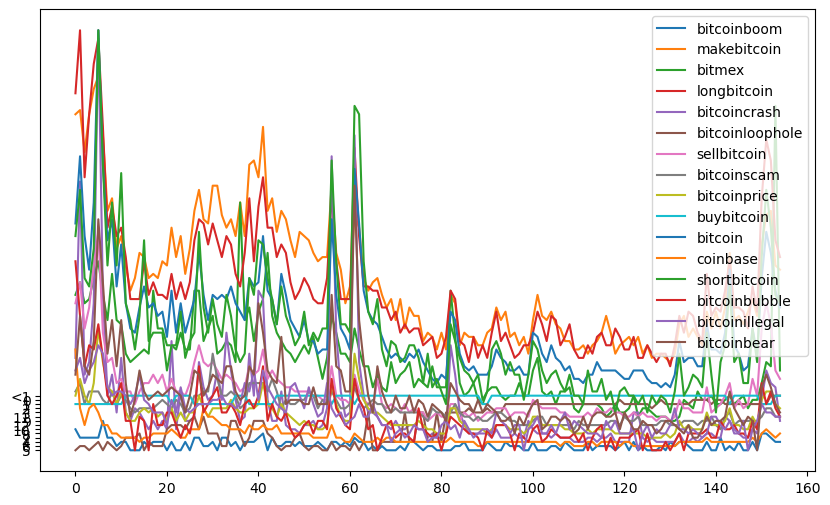

In [4]:
# plot by index
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
for column in df.columns[1:]:
    plt.plot(df.index, df[column], label=column)
plt.legend()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 154
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             155 non-null    object
 1   bitcoinboom      155 non-null    int64 
 2   makebitcoin      155 non-null    int64 
 3   bitmex           155 non-null    int64 
 4   longbitcoin      155 non-null    int64 
 5   bitcoincrash     155 non-null    int64 
 6   bitcoinloophole  155 non-null    object
 7   sellbitcoin      155 non-null    int64 
 8   bitcoinscam      155 non-null    int64 
 9   bitcoinprice     155 non-null    int64 
 10  buybitcoin       155 non-null    object
 11  bitcoin          155 non-null    int64 
 12  coinbase         155 non-null    int64 
 13  shortbitcoin     155 non-null    int64 
 14  bitcoinbubble    155 non-null    int64 
 15  bitcoinillegal   155 non-null    int64 
 16  bitcoinbear      155 non-null    int64 
dtypes: int64(14), object(3)
memory usag

In [6]:
# data cleaning
df["bitcoinloophole"].replace("<1", 0, inplace=True)
df["bitcoinloophole"] = df["bitcoinloophole"].astype(int)
df["buybitcoin"].replace("<1", 0, inplace=True)
df["buybitcoin"] = df["buybitcoin"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 154
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             155 non-null    object
 1   bitcoinboom      155 non-null    int64 
 2   makebitcoin      155 non-null    int64 
 3   bitmex           155 non-null    int64 
 4   longbitcoin      155 non-null    int64 
 5   bitcoincrash     155 non-null    int64 
 6   bitcoinloophole  155 non-null    int64 
 7   sellbitcoin      155 non-null    int64 
 8   bitcoinscam      155 non-null    int64 
 9   bitcoinprice     155 non-null    int64 
 10  buybitcoin       155 non-null    int64 
 11  bitcoin          155 non-null    int64 
 12  coinbase         155 non-null    int64 
 13  shortbitcoin     155 non-null    int64 
 14  bitcoinbubble    155 non-null    int64 
 15  bitcoinillegal   155 non-null    int64 
 16  bitcoinbear      155 non-null    int64 
dtypes: int64(16), object(1)
memory usag

In [7]:
# normalize for all columns in df except date
for column in df.columns[1:]:
    df[column] = df[column] / df[column].max()

df.describe()

,bitcoinboom,makebitcoin,bitmex,longbitcoin,bitcoincrash,bitcoinloophole,sellbitcoin,bitcoinscam,bitcoinprice,buybitcoin,bitcoin,coinbase,shortbitcoin,bitcoinbubble,bitcoinillegal,bitcoinbear
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,0.176037,0.453063,0.248387,0.381355,0.100581,0.317742,0.265633,0.416269,0.270078,0.225806,0.293032,0.135215,0.275161,0.153978,0.333677,0.205120
std,0.174447,0.171872,0.132371,0.155188,0.134716,0.255140,0.139466,0.136590,0.136514,0.419468,0.128591,0.107793,0.153798,0.142339,0.190335,0.138218
min,0.000000,0.235955,0.085366,0.200000,0.020000,0.000000,0.134615,0.217391,0.103448,0.000000,0.150000,0.041667,0.090000,0.000000,0.000000,0.000000
25%,0.000000,0.314607,0.146341,0.270000,0.030000,0.083333,0.173077,0.304348,0.172414,0.000000,0.200000,0.083333,0.170000,0.066667,0.200000,0.126984
50%,0.142857,0.404494,0.219512,0.350000,0.060000,0.250000,0.211538,0.391304,0.241379,0.000000,0.260000,0.083333,0.250000,0.111111,0.280000,0.174603
75%,0.285714,0.573034,0.304878,0.450000,0.110000,0.500000,0.307692,0.500000,0.344828,0.000000,0.355000,0.166667,0.325000,0.200000,0.440000,0.238095
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
positive_columns = [
    "bitcoinboom",
    "makebitcoin",
    "bitmex",
    "longbitcoin",
    "bitcoinprice",
    "buybitcoin",
    "bitcoin",
    "coinbase",
]
negative_columns = [
    "bitcoincrash",
    "bitcoinloophole",
    "sellbitcoin",
    "bitcoinscam",
    "shortbitcoin",
    "bitcoinbubble",
    "bitcoinillegal",
    "bitcoinbear",
]

df["positive"] = df[positive_columns].sum(axis=1)
df["negative"] = df[negative_columns].sum(axis=1)
df["signal"] = (df["positive"] - df["negative"]) / (df["positive"] + df["negative"])

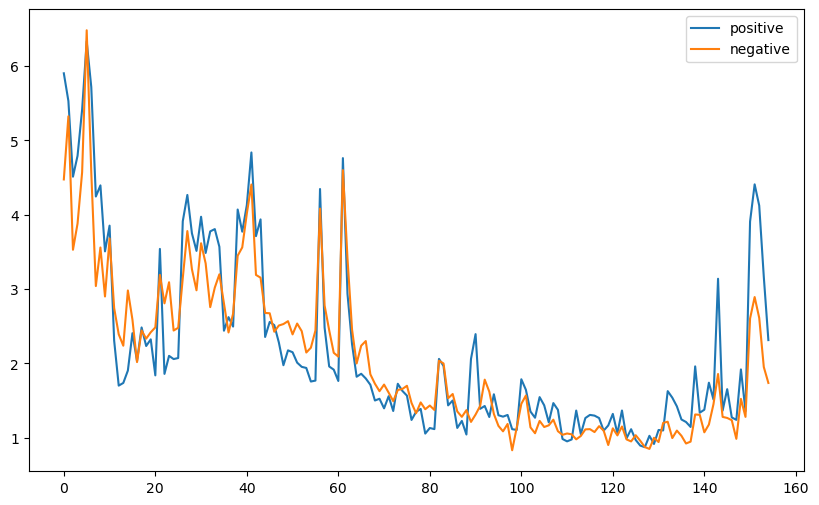

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["positive"], label="positive")
plt.plot(df.index, df["negative"], label="negative")
plt.legend()

In [10]:
df["signal"] = (df["positive"] - df["negative"]) / (df["positive"] + df["negative"])

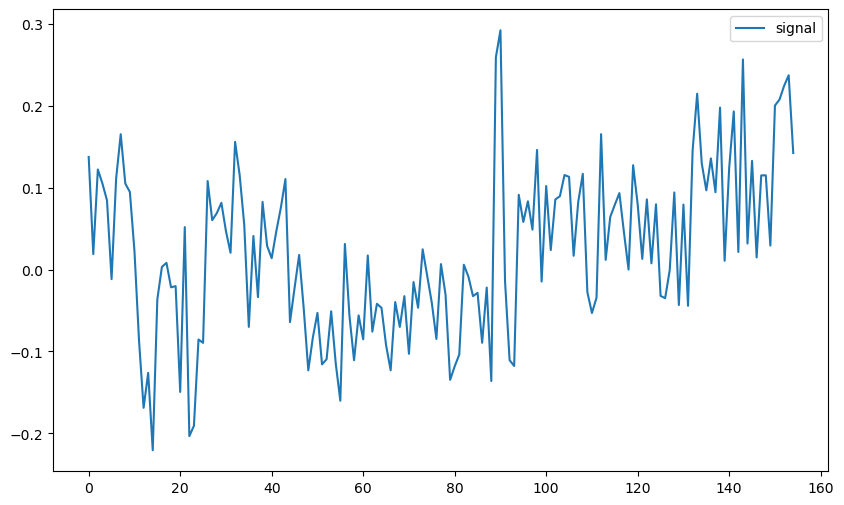

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["signal"], label="signal")
plt.legend()

<Axes: ylabel='Frequency'>

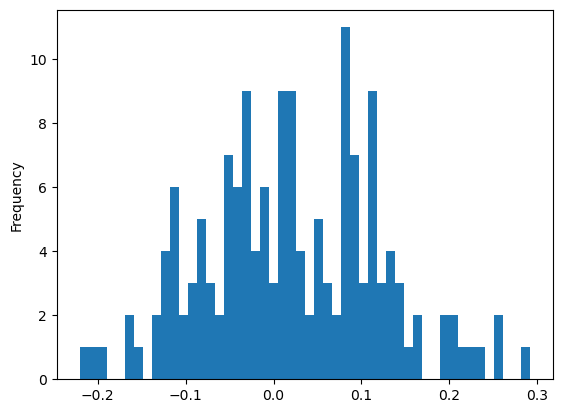

In [12]:
df["signal"].plot(kind="hist", bins=50)

In [13]:
# drop columns except date and signal
df = df[["date", "signal"]]
df

,date,signal
0,2021-04-11,0.137663
1,2021-04-18,0.018928
2,2021-04-25,0.122346
3,2021-05-02,0.105151
4,2021-05-09,0.084524
...,...,...
150,2024-02-25,0.200469
151,2024-03-03,0.207760
152,2024-03-10,0.224473
153,2024-03-17,0.237439


In [14]:
# Assuming 'Date' is your date column and 'Signal' is your signal data column
# First, ensure that 'Date' is of datetime type
df["date"] = pd.to_datetime(df["date"])

# Set 'Date' as the index
df.set_index("date", inplace=True)

# Resample to daily frequency, filling missing values with NaN
df_daily = df.resample("D").asfreq()

# Interpolate missing values
df_daily["signal"] = df_daily["signal"].interpolate(method="time")

# Reset the index
df_daily.reset_index(inplace=True)

In [15]:
df_daily

,date,signal
0,2021-04-11,0.137663
1,2021-04-12,0.120701
2,2021-04-13,0.103739
3,2021-04-14,0.086777
4,2021-04-15,0.069814
...,...,...
1074,2024-03-20,0.196742
1075,2024-03-21,0.183177
1076,2024-03-22,0.169611
1077,2024-03-23,0.156045


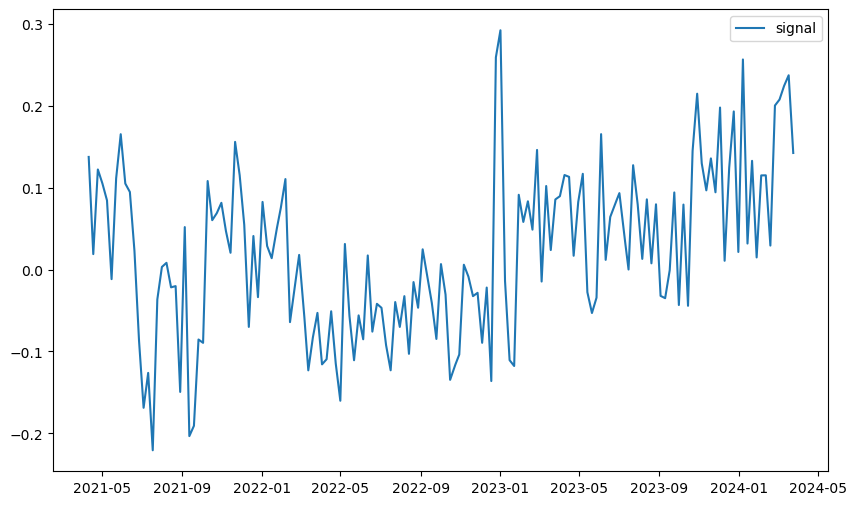

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(df_daily["date"], df_daily["signal"], label="signal")
plt.legend()

<Axes: ylabel='Frequency'>

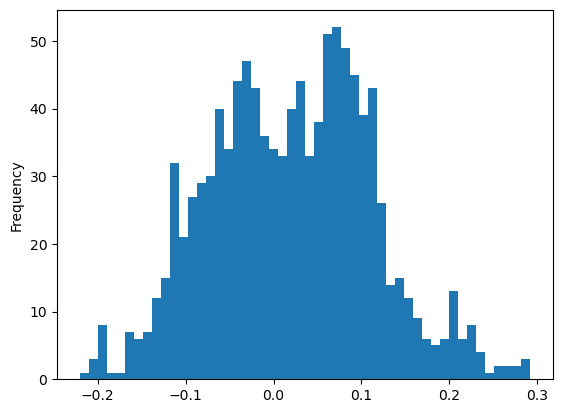

In [17]:
df_daily["signal"].plot(kind="hist", bins=50)

In [18]:
df_daily.to_csv("google_trends_signal_daily.csv", index=False)